# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_train_image, y_train_label), (x_test_image, y_test_label)=cifar100.load_data() 
print('train image numbers=', len(x_train_image))
print('test image numbers=',len(x_test_image))
print('train image',x_train_image.shape)
y_test_label.shape

169009152/169001437 [==============================] - 86s 1us/step
train image numbers= 50000
test image numbers= 10000
train image (50000, 32, 32, 3)


(10000, 1)

In [6]:
x_train_image[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

In [7]:
y_train_label[0][0]

19

In [8]:
import matplotlib.pyplot as plt
def plot_image(image):                         
    fig=plt.gcf()                                          #取得 pyplot 物件參考
    fig.set_size_inches(2, 2)                       #設定畫布大小為 2 吋*2吋
    plt.imshow(image, cmap='binary')       #以 binary (灰階) 顯示 28*28 圖形
    plt.show()                                             #顯示圖形



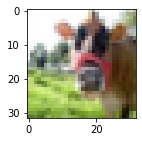

In [9]:
plot_image(x_train_image[0])

In [12]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,  prediction, idx,num=10): # labels,
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','#+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'#+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

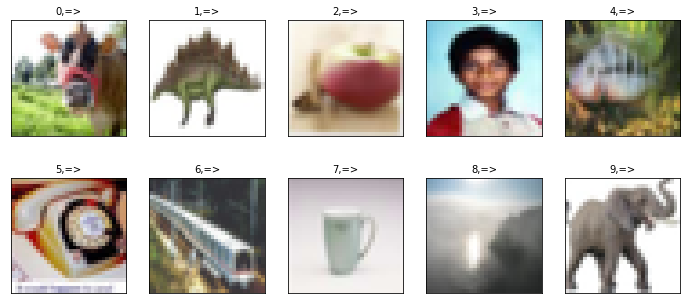

In [17]:
plot_images_labels_prediction(x_train_image, y_train_label, 0)


# Image normalize 

In [22]:
x_train_image[0][0][0]

array([255, 255, 255], dtype=uint8)

In [26]:
x_train_image_normalize=x_train_image.astype('float')/255
x_train_image_normalize[0][0][0]

array([1., 1., 1.])

# 轉換label 為OneHot Encoding

In [30]:
y_train_label

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [31]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_train_label)

In [35]:
y_label_train_OneHot.shape

(50000, 100)

In [36]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.